In [7]:
import pandas as pd
import sqlite3

# Define o caminho do banco de dados de forma relativa ao notebook
# O '..' significa "voltar uma pasta" para ir do 'ml' para o 'projeto_hermes'
# Depois, entramos na pasta 'db'
db_path = '../db/sensores.db'

# Conecta-se ao banco de dados e carrega os dados
try:
    conn = sqlite3.connect(db_path)
    df = pd.read_sql_query("SELECT * FROM LeiturasSensor", conn)
    conn.close()
    print("Dados carregados do banco de dados com sucesso!")
    print(df.head())
except sqlite3.Error as e:
    print(f"Erro ao carregar dados do banco: {e}")
    df = pd.DataFrame() # Cria um DataFrame vazio em caso de erro

Dados carregados do banco de dados com sucesso!
   amostra  temperatura  umidade  aceleracao_x  aceleracao_y  aceleracao_z  \
0        1         17.5     87.0         13312             0             0   
1        2         53.3     57.5         -9830        -13926         16384   
2        3         53.3     57.5         -9830        -13926         16384   
3        4         53.3     57.5         -9830        -13926         16384   
4        5         53.3     57.5         -9830        -13926         16384   

   potenciometro  
0            330  
1            280  
2            280  
3            280  
4            280  


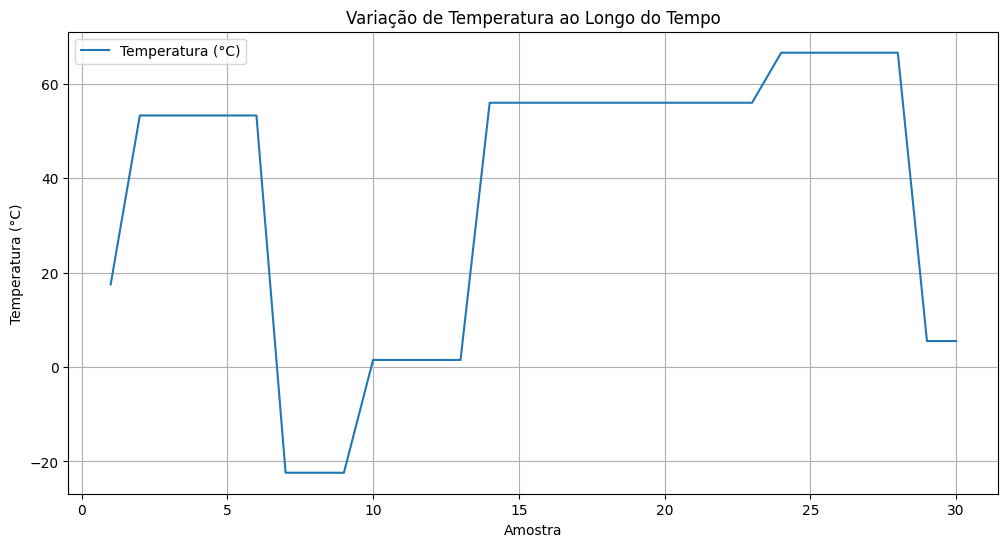


Estatísticas básicas dos dados:
         amostra  temperatura   umidade  aceleracao_x  aceleracao_y  \
count  30.000000    30.000000  30.00000     30.000000     30.000000   
mean   15.500000    37.560000  50.10000   1235.666667 -19360.200000   
std     8.803408    30.682283  20.86591  12032.428552   8131.148663   
min     1.000000   -22.400000  17.50000  -9830.000000 -28672.000000   
25%     8.250000     5.500000  26.50000  -9830.000000 -28672.000000   
50%    15.500000    54.650000  57.50000  -9830.000000 -13926.000000   
75%    22.750000    56.000000  68.37500  13926.000000 -13926.000000   
max    30.000000    66.600000  87.00000  13926.000000      0.000000   

       aceleracao_z  potenciometro  
count     30.000000      30.000000  
mean    8929.500000     414.600000  
std     9296.206938     322.072556  
min    -2457.000000      64.000000  
25%    -2457.000000      64.000000  
50%    16384.000000     345.000000  
75%    16384.000000     655.000000  
max    16384.000000     921.000

In [8]:
import matplotlib.pyplot as plt

# Gráfico da temperatura ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['amostra'], df['temperatura'], label='Temperatura (°C)')
plt.title('Variação de Temperatura ao Longo do Tempo')
plt.xlabel('Amostra')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Estatísticas básicas
print("\nEstatísticas básicas dos dados:")
print(df.describe())

Acurácia do Modelo: 1.00


c:\Users\fabio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


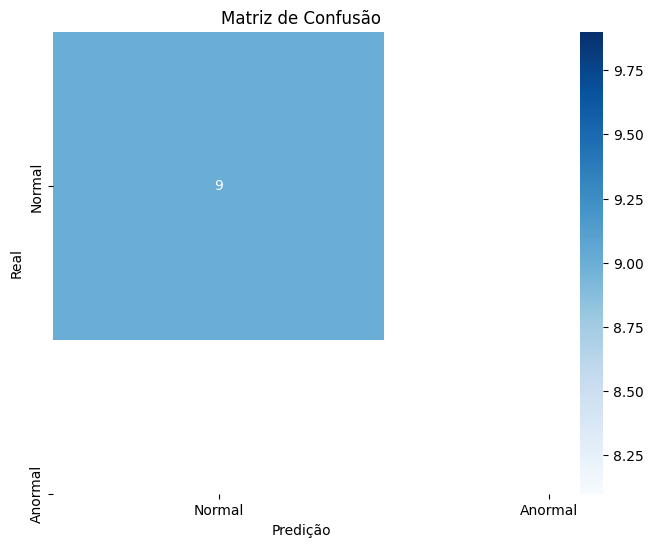

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Cria a variável alvo: 1 para "Anormal" se a aceleração total for alta, 0 para "Normal"
df['vib_total'] = abs(df['aceleracao_x']) + abs(df['aceleracao_y']) + abs(df['aceleracao_z'])
threshold_vib = 30000 
df['status_anormal'] = (df['vib_total'] > threshold_vib).astype(int)

# Define as features (características) e o alvo
features = ['temperatura', 'umidade', 'aceleracao_x', 'aceleracao_y', 'aceleracao_z', 'potenciometro']
target = 'status_anormal'

# Separa os dados em treino e teste
X = df[features]
y = df[target]
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria e treina o modelo de Regressão Logística
modelo = LogisticRegression(random_state=42)
modelo.fit(X_treino, y_treino)

# Avalia o modelo
y_previsoes = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, y_previsoes)
print(f"Acurácia do Modelo: {acuracia:.2f}")

# Exibe a Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsoes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anormal'], yticklabels=['Normal', 'Anormal'])
plt.ylabel('Real')
plt.xlabel('Predição')
plt.title('Matriz de Confusão')
plt.show()